In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
data = pd.read_csv("data.csv", index_col='ID')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Task 1 (1 point) Height

In [5]:
import re
r = re.compile(r"([0-9]+)'([0-9]+)")

def get_inches(el):
    if pd.isnull(el):
            return float('NaN')
    m = r.match(el)
    if m == None:
        return float('NaN')
    else:
        return int(m.group(1))*12 + float(m.group(2))

inches_TO_miter =  39.37  

data['Height_mt'] = data.apply(lambda row: get_inches(row['Height']) / inches_TO_miter, axis=1)

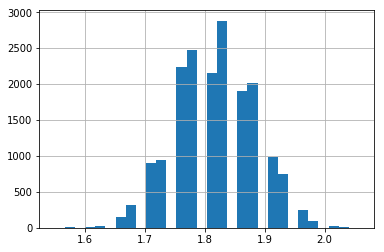

In [6]:
 data['Height_mt'].dropna().hist( bins=30)
 plt.show()

In [7]:
# Task 2 (0.5 point) Height

In [10]:
from sklearn.model_selection import train_test_split

data.fillna({'BallControl': data['BallControl'].mean(), 'Dribbling': data['Dribbling'].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data['Dribbling'].values, data['BallControl'].values, train_size=0.8)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
from sklearn.linear_model import Ridge

lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [22]:
data['predicted_BallControl'] = lr.predict(data['Dribbling'].values.reshape(-1, 1))
data[['Name', 'Dribbling', 'BallControl', 'predicted_BallControl']].head()

,Name,Dribbling,BallControl,predicted_BallControl
ID,,,,
158023,L. Messi,97.0,96.0,92.921026
20801,Cristiano Ronaldo,88.0,94.0,85.437572
190871,Neymar Jr,96.0,95.0,92.089531
193080,De Gea,18.0,42.0,27.232927
192985,K. De Bruyne,86.0,91.0,83.774582


In [23]:
def mse(y_true, y_pred):
    error = np.square(np.subtract(y_true, y_pred)).mean() 
    return error


In [24]:
from sklearn.metrics import mean_squared_error

assert round(mean_squared_error(y_train, y_pred_train), 9) == round(mse(y_train, y_pred_train), 9)
assert round(mean_squared_error(y_test, y_pred_test), 9) == round(mse(y_test, y_pred_test), 9)

In [25]:
print(f'Train MSE {mse(y_train, y_pred_train)}, test MSE {mse(y_test, y_pred_test)}')

Train MSE 32.09692346031591, test MSE 36.023920901261185


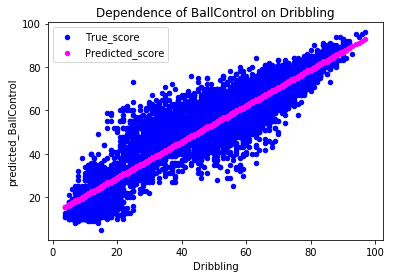

In [26]:
# Task 3 (1.5 points).
ax1 = data.plot(kind='scatter',x='Dribbling', y='BallControl', color='blue')
data.plot(kind='scatter',x='Dribbling', y='predicted_BallControl',  color='magenta', ax=ax1)
plt.legend(labels=['True_score', 'Predicted_score'])
plt.title('Dependence of BallControl on Dribbling')
plt.show()